In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pip install pyspark


In [3]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Dataframe').getOrCreate()



In [4]:
spark


In [5]:
df=spark.read.csv('/content/drive/MyDrive/Dataset/pubg.csv',header=True,inferSchema=True)


In [6]:
df.printSchema()


root
 |-- Id: string (nullable = true)
 |-- groupId: string (nullable = true)
 |-- matchId: string (nullable = true)
 |-- assists: integer (nullable = true)
 |-- boosts: integer (nullable = true)
 |-- damageDealt: double (nullable = true)
 |-- DBNOs: integer (nullable = true)
 |-- headshotKills: integer (nullable = true)
 |-- heals: integer (nullable = true)
 |-- killPlace: integer (nullable = true)
 |-- killPoints: integer (nullable = true)
 |-- kills: integer (nullable = true)
 |-- killStreaks: integer (nullable = true)
 |-- longestKill: double (nullable = true)
 |-- matchDuration: integer (nullable = true)
 |-- matchType: string (nullable = true)
 |-- maxPlace: integer (nullable = true)
 |-- numGroups: integer (nullable = true)
 |-- rankPoints: integer (nullable = true)
 |-- revives: integer (nullable = true)
 |-- rideDistance: double (nullable = true)
 |-- roadKills: integer (nullable = true)
 |-- swimDistance: double (nullable = true)
 |-- teamKills: integer (nullable = true)
 |--

In [7]:
type(df)


pyspark.sql.dataframe.DataFrame

In [8]:
df.head(5)


[Row(Id='7f96b2f878858a', groupId='4d4b580de459be', matchId='a10357fd1a4a91', assists=0, boosts=0, damageDealt=0.0, DBNOs=0, headshotKills=0, heals=0, killPlace=60, killPoints=1241, kills=0, killStreaks=0, longestKill=0.0, matchDuration=1306, matchType='squad-fpp', maxPlace=28, numGroups=26, rankPoints=-1, revives=0, rideDistance=0.0, roadKills=0, swimDistance=0.0, teamKills=0, vehicleDestroys=0, walkDistance=244.8, weaponsAcquired=1, winPoints=1466, winPlacePerc=0.4444),
 Row(Id='eef90569b9d03c', groupId='684d5656442f9e', matchId='aeb375fc57110c', assists=0, boosts=0, damageDealt=91.47, DBNOs=0, headshotKills=0, heals=0, killPlace=57, killPoints=0, kills=0, killStreaks=0, longestKill=0.0, matchDuration=1777, matchType='squad-fpp', maxPlace=26, numGroups=25, rankPoints=1484, revives=0, rideDistance=0.0045, roadKills=0, swimDistance=11.04, teamKills=0, vehicleDestroys=0, walkDistance=1434.0, weaponsAcquired=5, winPoints=0, winPlacePerc=0.64),
 Row(Id='1eaf90ac73de72', groupId='6a4a42c32

In [10]:
df.describe().show()


+-------+--------------+--------------+--------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+---------+------------------+------------------+-----------------+-------------------+------------------+--------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------------+
|summary|            Id|       groupId|       matchId|            assists|            boosts|       damageDealt|             DBNOs|      headshotKills|             heals|         killPlace|        killPoints|             kills|       killStreaks|       longestKill|     matchDuration|matchType|          maxPlace|         numGroups|       rankPoints|            revives|      rideDistance|           roadKills|      swimDistance|         teamKills|    vehi

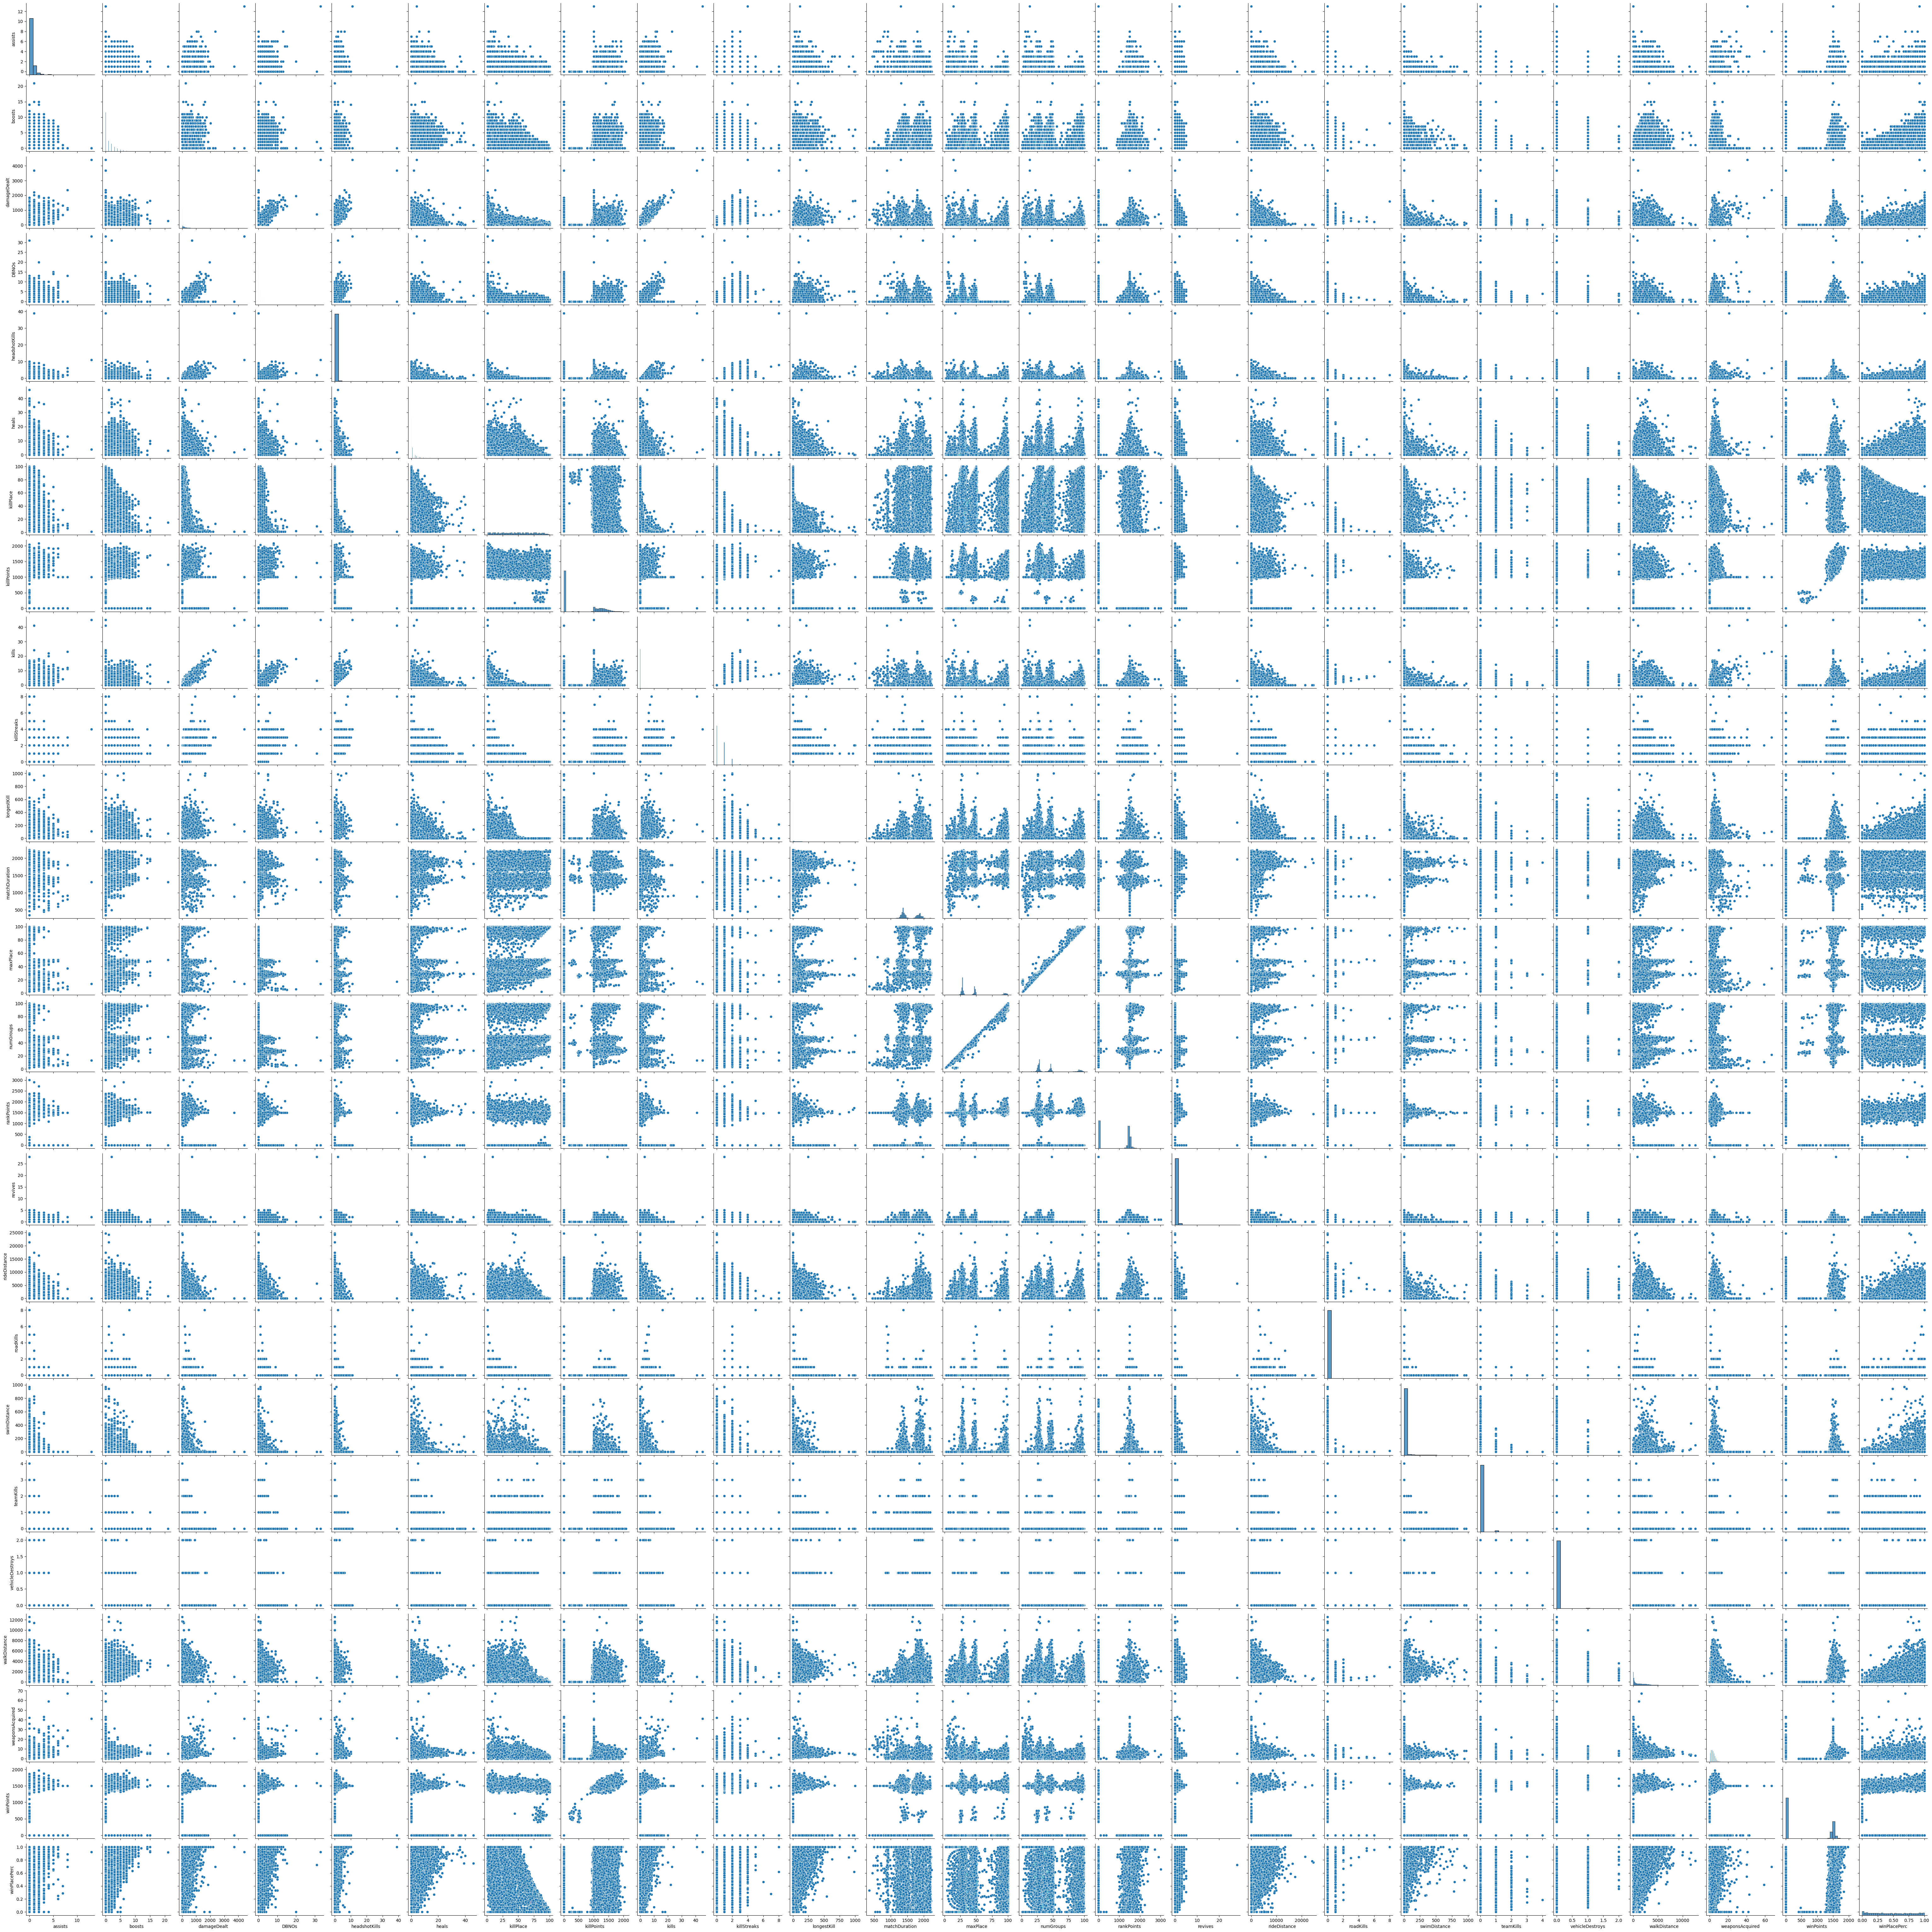

In [10]:
  # Sample the data
  # Example: % sample, without replacement

  fraction = 0.01
  sampled_data = df.sample(withReplacement=False, fraction=fraction, seed=42)

  # Convert to Pandas DataFrame
  pandas_df = sampled_data.toPandas()
  # Create the pairplot
  sns.pairplot(pandas_df)
  plt.show()



In [9]:
print(pandas_df.columns)  # Print the columns of pandas_df


NameError: name 'pandas_df' is not defined

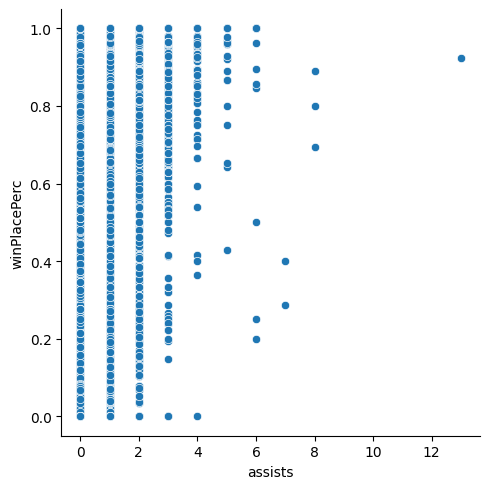

In [12]:
sns.relplot(x='assists', y='winPlacePerc', data=pandas_df)
plt.show()

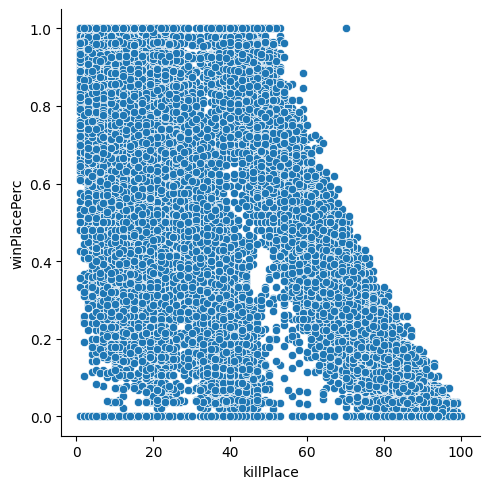

In [13]:
sns.relplot(x='killPlace',y='winPlacePerc',data=pandas_df)
# killPlace are not showing much trend for the winPlacePerc.

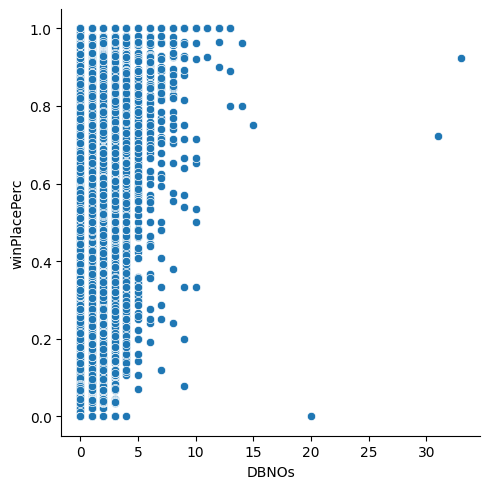

In [14]:

# Analyzing assists and winPlacePerc
sns.relplot(x='DBNOs',y='winPlacePerc',data=pandas_df)
# killPlace are showing trend for the winPlacePerc.

In [22]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("YourAppName") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()


ConnectionRefusedError: [Errno 111] Connection refused

In [11]:
from pyspark.sql.functions import count, when, col
# Get the column names from the DataFrame
columns_to_check = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc', 'matchType']

null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in columns_to_check])

# Show the results
null_counts.show()

+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+---------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+---------+
|      0|     0|          0|    0|            0|    0|        0|         0|    0|          0|          0|            0|       0|        0|         0|     

In [12]:
# prompt: how to clear the null value in column winPlaceprec

from pyspark.sql.functions import when, count, col, mean

# Calculate the mean of 'winPlacePerc'
mean_winPlacePerc = df.select(mean(col('winPlacePerc'))).collect()[0][0]

# Fill null values in 'winPlacePerc' with the mean
df = df.fillna(mean_winPlacePerc, subset=['winPlacePerc'])

# Verify the null counts again
null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in columns_to_check])
null_counts.show()


+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+---------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+---------+
|      0|     0|          0|    0|            0|    0|        0|         0|    0|          0|          0|            0|       0|        0|         0|     

In [14]:
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol="matchType",outputCol="matchType_")
df=indexer.fit(df).transform(df)
df.show()

+--------------+--------------+--------------+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|            Id|       groupId|       matchId|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+--------------+--------------+--------------+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+-----------

In [30]:
# prompt: i want to delete and drop first 3 column

# Get the first 3 column names
columns_to_drop = df.columns[:3]

# Drop the columns
pandas_df = df.drop('Id','groupId','matchId','matchType')

# Show the updated DataFrame
pandas_df.show()



+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|      0|     0|        0.0|    0|            0|    0|       60|      1241|    0|          0|        0.0|         1306|      28|       26|        -1|  

In [43]:
pandas_df = df.drop('matchType')
pandas_df.show()


+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|      0|     0|        0.0|    0|            0|    0|       60|      1241|    0|          0|        0.0|         1306|      28|       26|        -1|  

In [42]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Assuming df is your dataframe and the column to check is 'column_name'
column_name = df['assists']

# Calculate the mean and standard deviation of the column
mean_val = df.select(F.mean(F.col('assists'))).first()[0]
stddev_val = df.select(F.stddev(F.col('assists'))).first()[0]

# Calculate the Z-score for each row
df_with_zscore = df.withColumn('zscore', (F.col('assists') - mean_val) / stddev_val)

# Define a threshold for identifying outliers (commonly 3)
threshold = 3

# Separate outliers based on the Z-score
outliers = df_with_zscore.filter(F.abs(F.col('zscore')) > threshold)

# Separate the non-outliers
non_outliers = df_with_zscore.filter(F.abs(F.col('zscore')) <= threshold)

# Show results
outliers.show()
non_outliers.show()


+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+-----------------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|           zscore|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+-----------------+
|      3|     1|      395.2|    2|            1|    2|       13|   

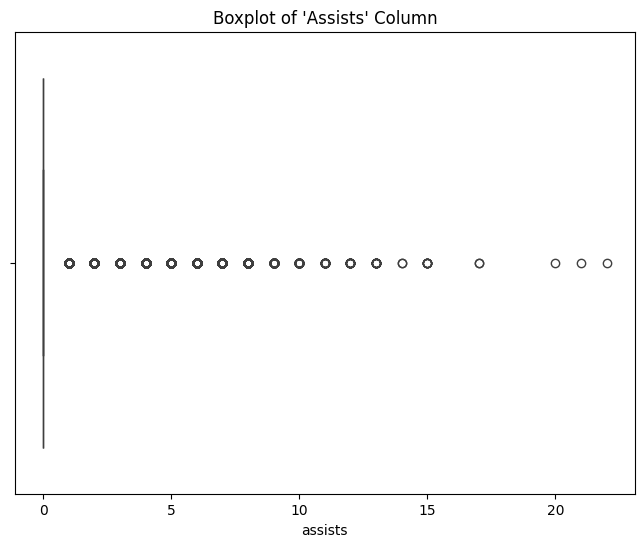

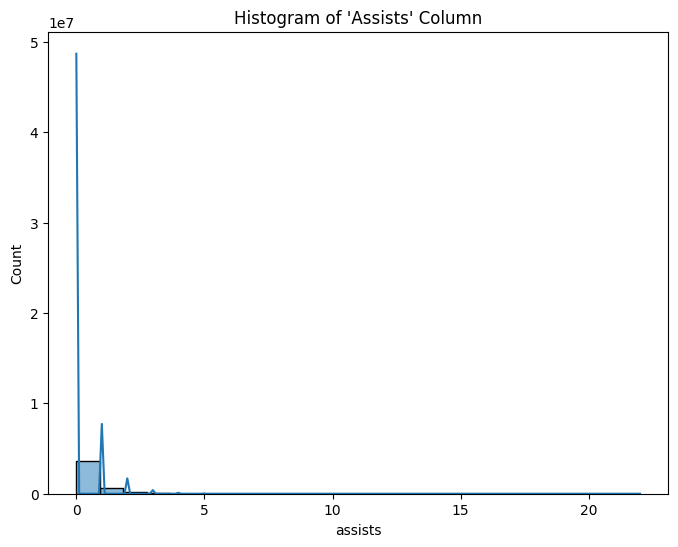

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your PySpark DataFrame
# Convert the "assists" column to a Pandas DataFrame for visualization
assists_df = df.select('assists').toPandas()

# Create a boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=assists_df['assists'])
plt.title("Boxplot of 'Assists' Column")
plt.show()

# Optionally, create a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(assists_df['assists'], kde=True)
plt.title("Histogram of 'Assists' Column")
plt.show()


In [46]:
from pyspark.sql import functions as F

# Assuming df is your DataFrame and you want to clean the "assists" column

# Set the Z-score threshold (commonly 3)
threshold = 3

# Calculate the mean and standard deviation of the "assists" column
mean_assists = df.select(F.mean(F.col('assists'))).first()[0]
stddev_assists = df.select(F.stddev(F.col('assists'))).first()[0]

# Calculate the Z-score for each row in the "assists" column
df_with_zscore = df.withColumn('zscore_assists', (F.col('assists') - mean_assists) / stddev_assists)

# Filter rows where the absolute Z-score is less than or equal to the threshold (no outliers)
df_cleaned = df_with_zscore.filter(F.abs(F.col('zscore_assists')) <= threshold)

# Show the cleaned DataFrame
df_cleaned.show()


+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+-------------------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|     zscore_assists|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+-------------------+
|      0|     0|        0.0|    0|            0|    0|       

In [48]:
df_cleaned.describe('assists').show()


+-------+-------------------+
|summary|            assists|
+-------+-------------------+
|  count|            4259543|
|   mean|0.13895457799111313|
| stddev| 0.3458991635367276|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [50]:
from pyspark.sql import functions as F

# Assuming df is your PySpark DataFrame and you want to check the outliers in the "assists" column
threshold = 3  # Z-score threshold to identify outliers

# Calculate the mean and standard deviation of the "assists" column
mean_assists = df.select(F.mean(F.col('assists'))).first()[0]
stddev_assists = df.select(F.stddev(F.col('assists'))).first()[0]

# Calculate the upper and lower bounds
lower_bound = mean_assists - (threshold * stddev_assists)
upper_bound = mean_assists + (threshold * stddev_assists)

# Print the calculated bounds
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Lower Bound: -1.5319043414949098
Upper Bound: 1.9995341817050665


In [51]:
df_cleaned = df.filter((F.col('assists') >= lower_bound) & (F.col('assists') <= upper_bound))
df_cleaned.show()


+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|      0|     0|        0.0|    0|            0|    0|       60|      1241|    0|          0|        0.0|         1306|sq

In [53]:
df_cleaned = df.filter((F.col('assists') >= 0) & (F.col('assists') <= 1))
df_cleaned.show()



+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|      0|     0|        0.0|    0|            0|    0|       60|      1241|    0|          0|        0.0|         1306|sq

In [54]:
df_cleaned.describe('assists').show()


+-------+-------------------+
|summary|            assists|
+-------+-------------------+
|  count|            4259543|
|   mean|0.13895457799111313|
| stddev| 0.3458991635367276|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



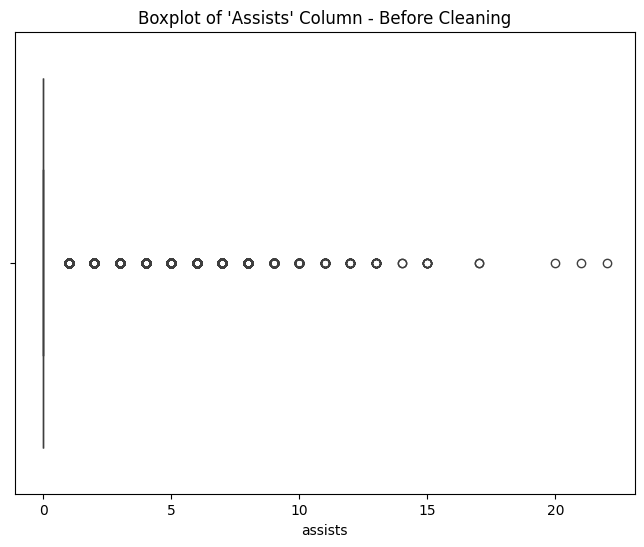

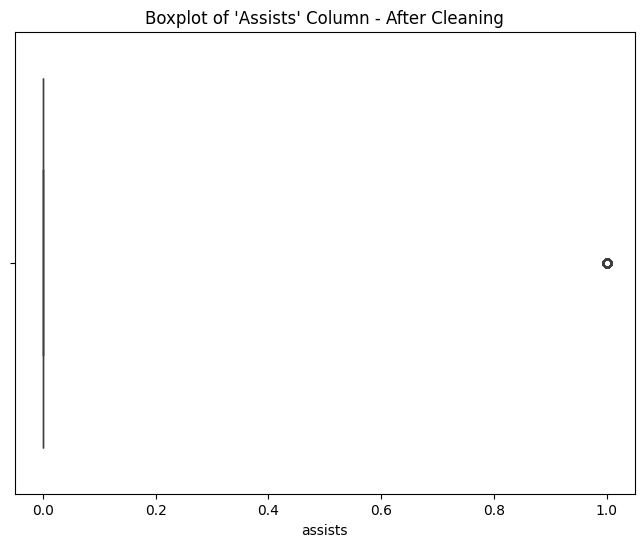

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the original DataFrame and df_cleaned is the cleaned DataFrame
# Convert the "assists" column to Pandas DataFrame for visualization
assists_df = df.select('assists').toPandas()
assists_cleaned_df = df_cleaned.select('assists').toPandas()

# Create a boxplot to visualize the "assists" column before cleaning outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=assists_df['assists'])
plt.title("Boxplot of 'Assists' Column - Before Cleaning")
plt.show()

# Create a boxplot to visualize the "assists" column after cleaning outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=assists_cleaned_df['assists'])
plt.title("Boxplot of 'Assists' Column - After Cleaning")
plt.show()


In [56]:
df.describe('boosts').show()


+-------+------------------+
|summary|            boosts|
+-------+------------------+
|  count|           4446966|
|   mean|1.1069077209045448|
| stddev|1.7157936773815547|
|    min|                 0|
|    max|                33|
+-------+------------------+



In [57]:
from pyspark.sql import functions as F

# Given statistics for "boosts" column
mean_boosts = 1.1069077209045448
stddev_boosts = 1.7157936773815547
threshold = 3  # Z-score threshold for outliers

# Step 1: Calculate the lower and upper bounds for outliers
lower_bound_boosts = mean_boosts - (threshold * stddev_boosts)
upper_bound_boosts = mean_boosts + (threshold * stddev_boosts)

# Print the calculated bounds
print(f"Lower Bound: {lower_bound_boosts}")
print(f"Upper Bound: {upper_bound_boosts}")

# Step 2: Filter out rows where "boosts" are outside the bounds (outliers)
df_cleaned_boosts = df.filter((F.col('boosts') >= lower_bound_boosts) & (F.col('boosts') <= upper_bound_boosts))

# Show the cleaned DataFrame (with outliers removed)
df_cleaned_boosts.show()


Lower Bound: -4.040473311240119
Upper Bound: 6.254288753049209
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|      0|     0|        0.0|    0|            0|    0|    

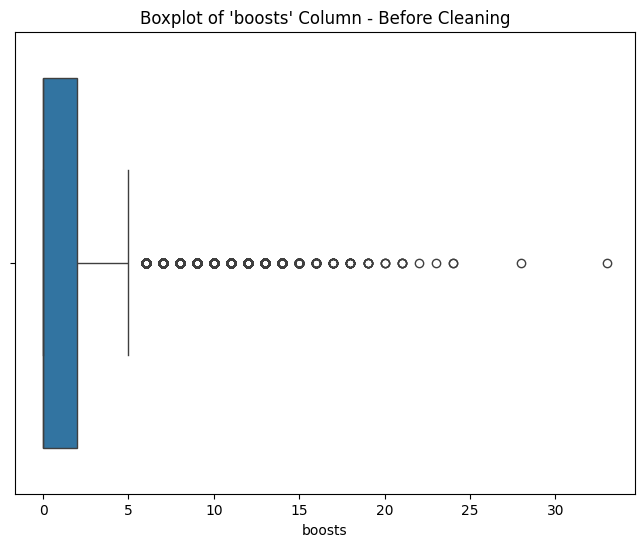

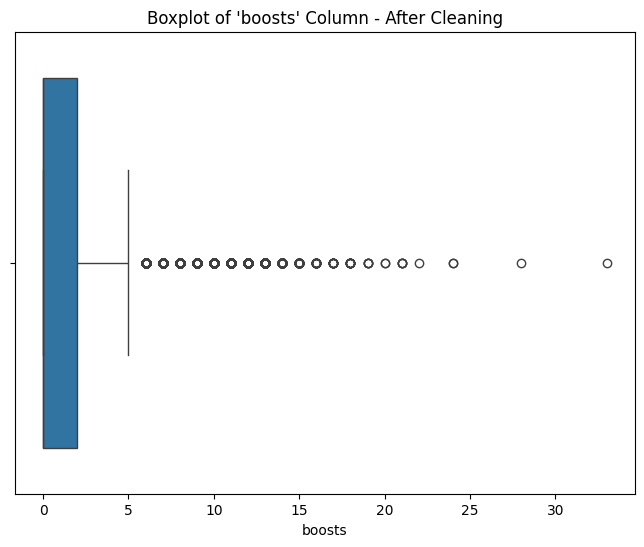

In [58]:

# Assuming df is the original DataFrame and df_cleaned is the cleaned DataFrame
# Convert the "assists" column to Pandas DataFrame for visualization
assists_df = df.select('boosts').toPandas()
assists_cleaned_df = df_cleaned.select('boosts').toPandas()

# Create a boxplot to visualize the "assists" column before cleaning outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=assists_df['boosts'])
plt.title("Boxplot of 'boosts' Column - Before Cleaning")
plt.show()

# Create a boxplot to visualize the "assists" column after cleaning outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=assists_cleaned_df['boosts'])
plt.title("Boxplot of 'boosts' Column - After Cleaning")
plt.show()


In [59]:
df.describe('damageDealt').show()


+-------+------------------+
|summary|       damageDealt|
+-------+------------------+
|  count|           4446966|
|   mean| 130.7171378984221|
| stddev|170.78062066696378|
|    min|               0.0|
|    max|            6616.0|
+-------+------------------+



In [60]:
from pyspark.sql import functions as F

# Given statistics for "damageDealt" column
mean_damageDealt = 130.7171378984221
stddev_damageDealt = 170.78062066696378
threshold = 3  # Z-score threshold for outliers

# Step 1: Calculate the lower and upper bounds for outliers
lower_bound_damageDealt = mean_damageDealt - (threshold * stddev_damageDealt)
upper_bound_damageDealt = mean_damageDealt + (threshold * stddev_damageDealt)

# Print the calculated bounds
print(f"Lower Bound: {lower_bound_damageDealt}")
print(f"Upper Bound: {upper_bound_damageDealt}")

# Step 2: Filter out rows where "damageDealt" is outside the bounds (outliers)
df_cleaned_damageDealt = df.filter((F.col('damageDealt') >= lower_bound_damageDealt) & (F.col('damageDealt') <= upper_bound_damageDealt))

# Show the cleaned DataFrame (with outliers removed)
df_cleaned_damageDealt.show()


Lower Bound: -381.6247241024692
Upper Bound: 643.0589998993134
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|      0|     0|        0.0|    0|            0|    0|    

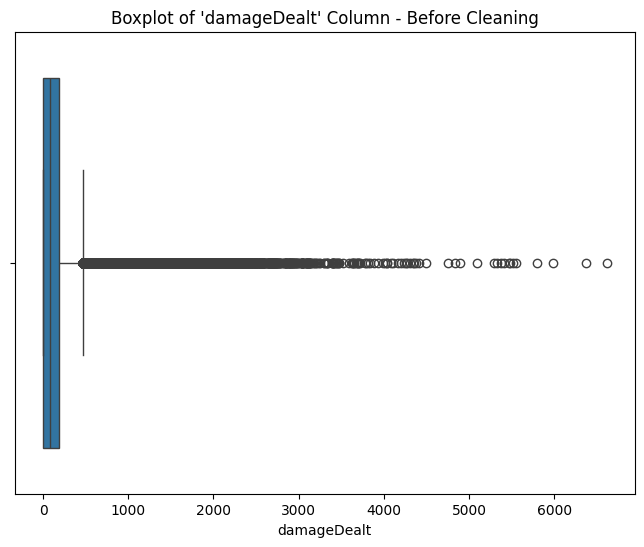

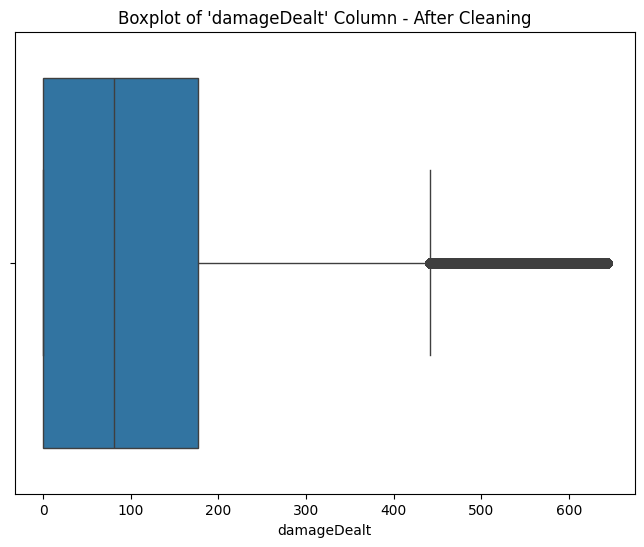

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the original "damageDealt" column to Pandas DataFrame for visualization
damageDealt_df = df.select('damageDealt').toPandas()
damageDealt_cleaned_df = df_cleaned_damageDealt.select('damageDealt').toPandas()

# Create a boxplot to visualize the "damageDealt" column before cleaning outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=damageDealt_df['damageDealt'])
plt.title("Boxplot of 'damageDealt' Column - Before Cleaning")
plt.show()

# Create a boxplot to visualize the "damageDealt" column after cleaning outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=damageDealt_cleaned_df['damageDealt'])
plt.title("Boxplot of 'damageDealt' Column - After Cleaning")
plt.show()


In [62]:
df.describe('DBNOs').show()


+-------+------------------+
|summary|             DBNOs|
+-------+------------------+
|  count|           4446966|
|   mean|0.6578755043326169|
| stddev| 1.145742724900561|
|    min|                 0|
|    max|                53|
+-------+------------------+



In [63]:
from pyspark.sql import functions as F

# Given statistics for "DBNOs" column
mean_DBNOs = 0.6578755043326169
stddev_DBNOs = 1.145742724900561
threshold = 3  # Z-score threshold for outliers

# Step 1: Calculate the lower and upper bounds for outliers
lower_bound_DBNOs = mean_DBNOs - (threshold * stddev_DBNOs)
upper_bound_DBNOs = mean_DBNOs + (threshold * stddev_DBNOs)

# Print the calculated bounds
print(f"Lower Bound: {lower_bound_DBNOs}")
print(f"Upper Bound: {upper_bound_DBNOs}")

# Step 2: Filter out rows where "DBNOs" is outside the bounds (outliers)
df_cleaned_DBNOs = df.filter((F.col('DBNOs') >= lower_bound_DBNOs) & (F.col('DBNOs') <= upper_bound_DBNOs))

# Show the cleaned DataFrame (with outliers removed)
df_cleaned_DBNOs.show()


Lower Bound: -2.779352670369066
Upper Bound: 4.0951036790343
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|      0|     0|        0.0|    0|            0|    0|      

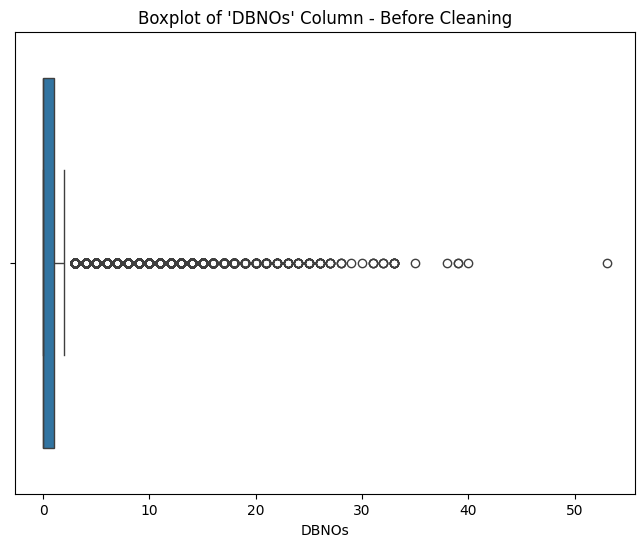

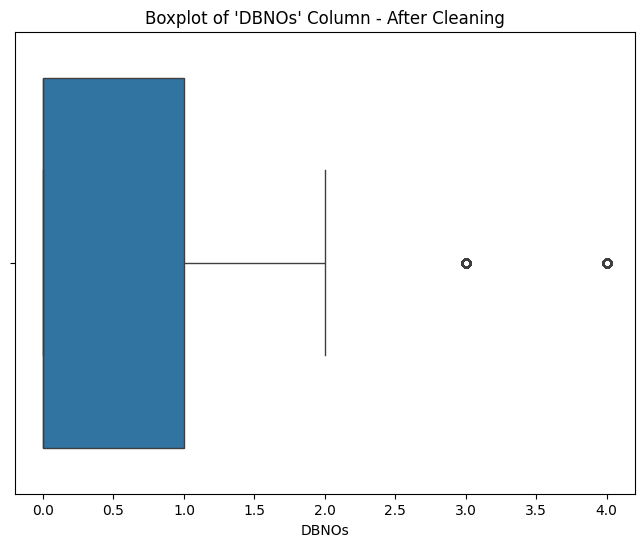

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the original "DBNOs" column to Pandas DataFrame for visualization
DBNOs_df = df.select('DBNOs').toPandas()
DBNOs_cleaned_df = df_cleaned_DBNOs.select('DBNOs').toPandas()

# Create a boxplot to visualize the "DBNOs" column before cleaning outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=DBNOs_df['DBNOs'])
plt.title("Boxplot of 'DBNOs' Column - Before Cleaning")
plt.show()

# Create a boxplot to visualize the "DBNOs" column after cleaning outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=DBNOs_cleaned_df['DBNOs'])
plt.title("Boxplot of 'DBNOs' Column - After Cleaning")
plt.show()


In [65]:
df.describe('headshotKills').show()


+-------+-------------------+
|summary|      headshotKills|
+-------+-------------------+
|  count|            4446966|
|   mean|0.22681958890623405|
| stddev| 0.6021552757837211|
|    min|                  0|
|    max|                 64|
+-------+-------------------+



In [66]:
from pyspark.sql import functions as F

# Given statistics for "headshotKills" column
mean_headshotKills = 0.22681958890623405
stddev_headshotKills = 0.6021552757837211
threshold = 3  # Z-score threshold for outliers

# Step 1: Calculate the lower and upper bounds for outliers
lower_bound_headshotKills = mean_headshotKills - (threshold * stddev_headshotKills)
upper_bound_headshotKills = mean_headshotKills + (threshold * stddev_headshotKills)

# Print the calculated bounds
print(f"Lower Bound: {lower_bound_headshotKills}")
print(f"Upper Bound: {upper_bound_headshotKills}")

# Step 2: Filter out rows where "headshotKills" is outside the bounds (outliers)
df_cleaned_headshotKills = df.filter((F.col('headshotKills') >= lower_bound_headshotKills) & (F.col('headshotKills') <= upper_bound_headshotKills))

# Show the cleaned DataFrame (with outliers removed)
df_cleaned_headshotKills.show()


Lower Bound: -1.5796462384449292
Upper Bound: 2.0332854162573972
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|      0|     0|        0.0|    0|            0|    0|  

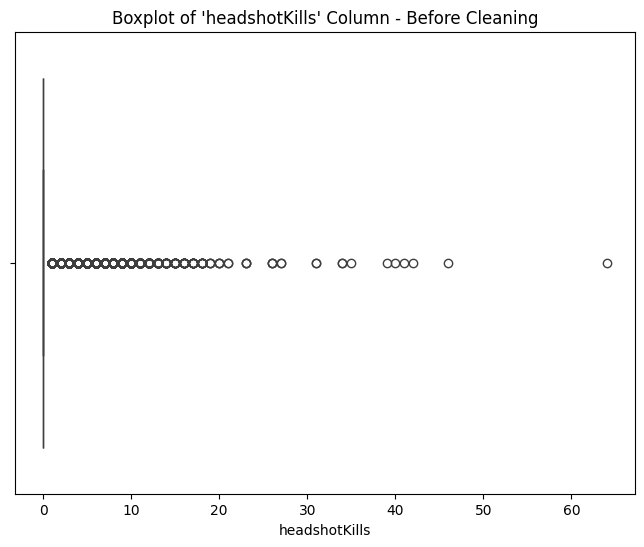

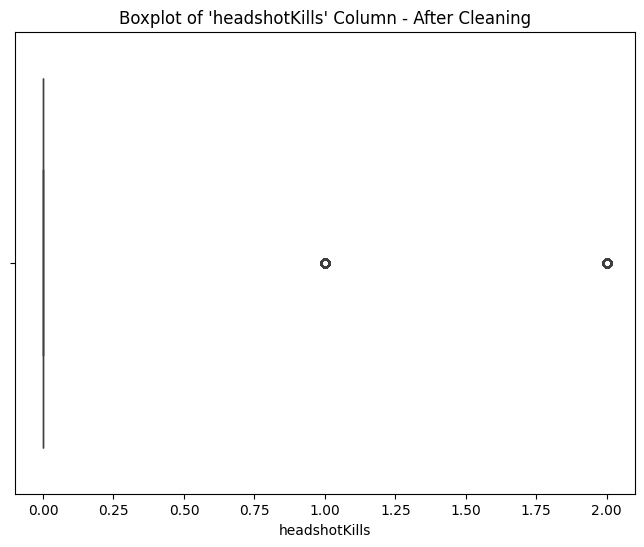

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the original "headshotKills" column to Pandas DataFrame for visualization
headshotKills_df = df.select('headshotKills').toPandas()
headshotKills_cleaned_df = df_cleaned_headshotKills.select('headshotKills').toPandas()

# Create a boxplot to visualize the "headshotKills" column before cleaning outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=headshotKills_df['headshotKills'])
plt.title("Boxplot of 'headshotKills' Column - Before Cleaning")
plt.show()

# Create a boxplot to visualize the "headshotKills" column after cleaning outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=headshotKills_cleaned_df['headshotKills'])
plt.title("Boxplot of 'headshotKills' Column - After Cleaning")
plt.show()


In [68]:
df.describe('heals').show()


+-------+------------------+
|summary|             heals|
+-------+------------------+
|  count|           4446966|
|   mean| 1.370147196987789|
| stddev|2.6799822305289713|
|    min|                 0|
|    max|                80|
+-------+------------------+



In [69]:
from pyspark.sql import functions as F

# Given statistics for "heals" column
mean_heals = 1.370147196987789
stddev_heals = 2.6799822305289713
threshold = 3  # Z-score threshold for outliers

# Step 1: Calculate the lower and upper bounds for outliers
lower_bound_heals = mean_heals - (threshold * stddev_heals)
upper_bound_heals = mean_heals + (threshold * stddev_heals)

# Print the calculated bounds
print(f"Lower Bound: {lower_bound_heals}")
print(f"Upper Bound: {upper_bound_heals}")

# Step 2: Filter out rows where "heals" is outside the bounds (outliers)
df_cleaned_heals = df.filter((F.col('heals') >= lower_bound_heals) & (F.col('heals') <= upper_bound_heals))

# Show the cleaned DataFrame (with outliers removed)
df_cleaned_heals.show()


Lower Bound: -6.6697994945991255
Upper Bound: 9.410093888574703
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|      0|     0|        0.0|    0|            0|    0|   

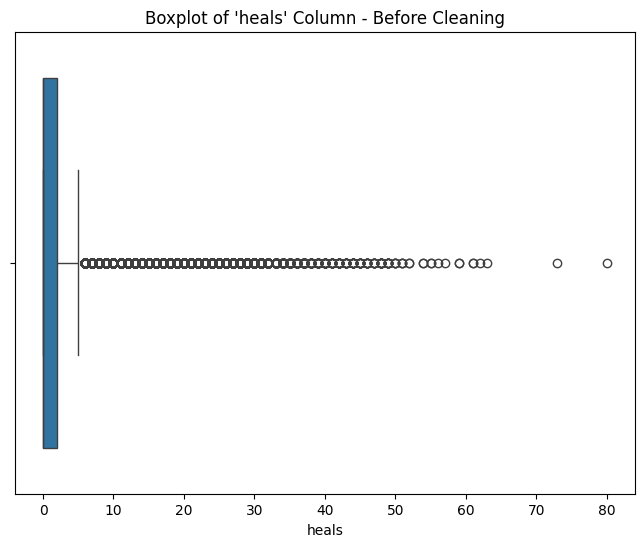

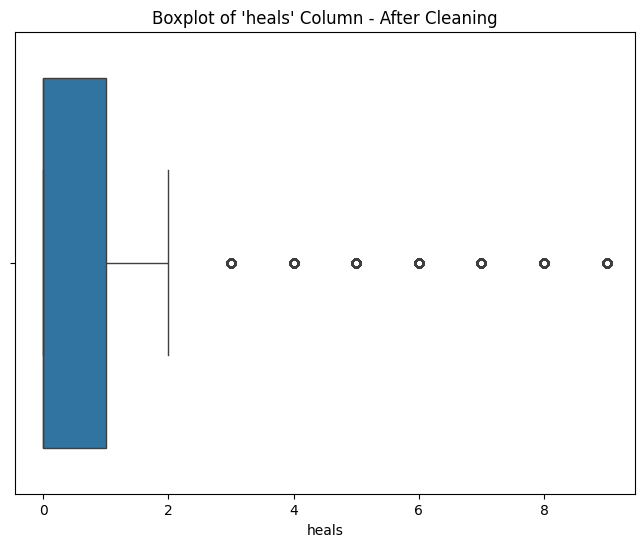

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the original "heals" column to Pandas DataFrame for visualization
heals_df = df.select('heals').toPandas()
heals_cleaned_df = df_cleaned_heals.select('heals').toPandas()

# Create a boxplot to visualize the "heals" column before cleaning outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=heals_df['heals'])
plt.title("Boxplot of 'heals' Column - Before Cleaning")
plt.show()

# Create a boxplot to visualize the "heals" column after cleaning outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=heals_cleaned_df['heals'])
plt.title("Boxplot of 'heals' Column - After Cleaning")
plt.show()


In [71]:
df.describe('killPlace').show()


+-------+------------------+
|summary|         killPlace|
+-------+------------------+
|  count|           4446966|
|   mean| 47.59935020865912|
| stddev|27.462937018409566|
|    min|                 1|
|    max|               101|
+-------+------------------+



In [72]:
from pyspark.sql import functions as F

# Given statistics for "killPlace" column
mean_killPlace = 47.59935020865912
stddev_killPlace = 27.462937018409566
threshold = 3  # Z-score threshold for outliers

# Step 1: Calculate the lower and upper bounds for outliers
lower_bound_killPlace = mean_killPlace - (threshold * stddev_killPlace)
upper_bound_killPlace = mean_killPlace + (threshold * stddev_killPlace)

# Print the calculated bounds
print(f"Lower Bound: {lower_bound_killPlace}")
print(f"Upper Bound: {upper_bound_killPlace}")

# Step 2: Filter out rows where "killPlace" is outside the bounds (outliers)
df_cleaned_killPlace = df.filter((F.col('killPlace') >= lower_bound_killPlace) & (F.col('killPlace') <= upper_bound_killPlace))

# Show the cleaned DataFrame (with outliers removed)
df_cleaned_killPlace.show()


Lower Bound: -34.78946084656958
Upper Bound: 129.98816126388783
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|      0|     0|        0.0|    0|            0|    0|   

In [73]:
spark.stop

<bound method SparkSession.stop of <pyspark.sql.session.SparkSession object at 0x7ec677c17250>>